# Part 2

# Question 2

1. Load the attached csv file in python. Each row consists of feature 1, feature 2, class label.
 

2. Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) in each layer with 70% training and 30% validation data. Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same. Report, compare, and explain the observed accuracy and minimum loss achieved. [0.5+1 mark]
 

3. Visually observe the dataset and design an appropriate feature transformation (derived feature) such that after feature transformation, the dataset can be classified using a minimal network architecture (minimum number of parameters). Design, train this minimal network, and report training and validation errors, and trained parameters of the network. Use 70% training and 30% validation data, appropriate learning rate, activation and loss functions. Explain the final results. [1+1+0.5 marks]

# 1. Import Libraries/Dataset

## 1.1 Import the required libraries and the dataset 

In [91]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [63]:
# loading data
data = pd.read_csv('data1_0.25.csv', header=None)

# adding headers
data.columns =['F1', 'F2', 'label']
data.head()

# splitting the data into x and y 
x = data[['F1', 'F2']]
y = data[['label']]

## Analysing data

When we analyse the distribution of data between the label to be predicted, we can see that the distribution is more skewed towards 1 with more than 440 samples having 1s.

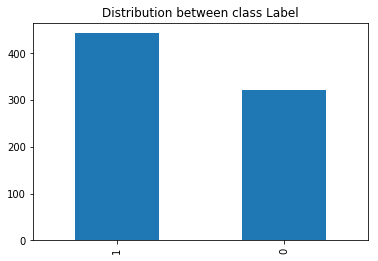

In [93]:
def class_label_distribution():
    fig, axs =  plt.subplots(nrows=1, sharex=True)
    data.label.value_counts().plot.bar(ax=axs, title="Distribution between class Label")
    plt.show()
class_label_distribution()

In the scatterplot created below, we can see the spread for both features. There is one point which stands out from the graph, for 0s the range usually is from -0.75 to 0.75 whereas for 1 it usually is more distributed from -1.0 to 1.0.

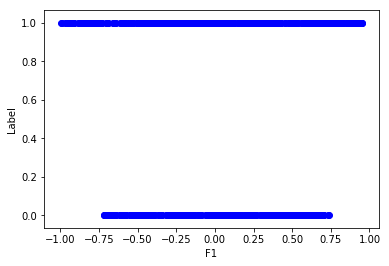

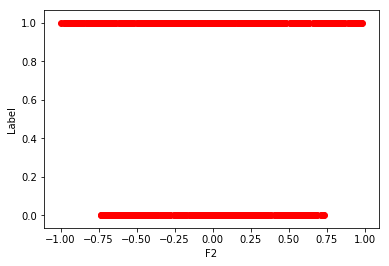

In [100]:
plt.scatter(data["F1"], data.label, c ="blue")
plt.xlabel("F1")
plt.ylabel("Label")
plt.show()

plt.scatter(data["F2"], data.label, c ="red")
plt.xlabel("F2")
plt.ylabel("Label")
plt.show()

## Splitting the data into 70:30 for train:validation

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [104]:
# One hot encoding the labels
enc = OneHotEncoder(handle_unknown='ignore')

y_train = pd.DataFrame(enc.fit_transform(y_train).toarray()).values
y_test = pd.DataFrame(enc.fit_transform(y_test).toarray()).values

## Model with hidden nodes as 4, 8

### Training

In [114]:
model48 = keras.Sequential()
model48.add(Dense(4, input_dim=2, activation="relu"))
model48.add(Dense(12, activation="relu"))
model48.add(Dense(2, activation="softmax"))

model48.compile(optimizer='Nadam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history48 = model48.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=40)

Epoch 1/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.6937 - accuracy: 0.5234 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5103 - val_loss: 0.6897 - val_accuracy: 0.5522
Epoch 3/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5888 - val_loss: 0.6881 - val_accuracy: 0.5391
Epoch 4/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5925 - val_loss: 0.6868 - val_accuracy: 0.5435
Epoch 5/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5925 - val_loss: 0.6859 - val_accuracy: 0.5478
Epoch 6/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5925 - val_loss: 0.6852 - val_accuracy: 0.5478
Epoch 7/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5925 - val_loss: 0.6847 - val_accuracy: 0.5478
Epoch 

14/14 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.5925 - val_loss: 0.6808 - val_accuracy: 0.5478
Epoch 59/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.5925 - val_loss: 0.6805 - val_accuracy: 0.5478
Epoch 60/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.5925 - val_loss: 0.6800 - val_accuracy: 0.5478
Epoch 61/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.5925 - val_loss: 0.6798 - val_accuracy: 0.5478
Epoch 62/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.5925 - val_loss: 0.6798 - val_accuracy: 0.5478
Epoch 63/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.5925 - val_loss: 0.6795 - val_accuracy: 0.5478
Epoch 64/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.5925 - val_loss: 0.6794 - val_accuracy: 0.5478
Epoch 65/1000

14/14 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.6505 - val_loss: 0.6083 - val_accuracy: 0.6130
Epoch 171/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.6579 - val_loss: 0.6058 - val_accuracy: 0.6130
Epoch 172/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.6579 - val_loss: 0.6051 - val_accuracy: 0.6130
Epoch 173/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.5777 - accuracy: 0.6505 - val_loss: 0.6031 - val_accuracy: 0.6130
Epoch 174/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.6617 - val_loss: 0.6015 - val_accuracy: 0.6174
Epoch 175/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5750 - accuracy: 0.6710 - val_loss: 0.6006 - val_accuracy: 0.6174
Epoch 176/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5740 - accuracy: 0.6636 - val_loss: 0.5996 - val_accuracy: 0.6174
Epoch 1

Epoch 227/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.7084 - val_loss: 0.5641 - val_accuracy: 0.6826
Epoch 228/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.7084 - val_loss: 0.5635 - val_accuracy: 0.6826
Epoch 229/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.7121 - val_loss: 0.5635 - val_accuracy: 0.6783
Epoch 230/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.7140 - val_loss: 0.5636 - val_accuracy: 0.6783
Epoch 231/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5378 - accuracy: 0.7103 - val_loss: 0.5633 - val_accuracy: 0.6783
Epoch 232/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.7084 - val_loss: 0.5629 - val_accuracy: 0.6783
Epoch 233/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.7084 - val_loss: 0.5622 - val_accuracy:

Epoch 340/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7271 - val_loss: 0.5228 - val_accuracy: 0.7043
Epoch 341/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7290 - val_loss: 0.5225 - val_accuracy: 0.7087
Epoch 342/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.7271 - val_loss: 0.5218 - val_accuracy: 0.7043
Epoch 343/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7290 - val_loss: 0.5207 - val_accuracy: 0.7087
Epoch 344/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7290 - val_loss: 0.5205 - val_accuracy: 0.7043
Epoch 345/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.7271 - val_loss: 0.5212 - val_accuracy: 0.7087
Epoch 346/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7308 - val_loss: 0.5211 - val_accuracy:

Epoch 453/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7421 - val_loss: 0.4947 - val_accuracy: 0.7130
Epoch 454/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7421 - val_loss: 0.4949 - val_accuracy: 0.7130
Epoch 455/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7402 - val_loss: 0.4945 - val_accuracy: 0.7130
Epoch 456/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7383 - val_loss: 0.4941 - val_accuracy: 0.7130
Epoch 457/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7364 - val_loss: 0.4934 - val_accuracy: 0.7217
Epoch 458/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7346 - val_loss: 0.4934 - val_accuracy: 0.7174
Epoch 459/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4815 - accuracy: 0.7402 - val_loss: 0.4933 - val_accuracy:

Epoch 566/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7589 - val_loss: 0.4782 - val_accuracy: 0.7304
Epoch 567/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7645 - val_loss: 0.4779 - val_accuracy: 0.7348
Epoch 568/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.7645 - val_loss: 0.4781 - val_accuracy: 0.7348
Epoch 569/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7626 - val_loss: 0.4782 - val_accuracy: 0.7391
Epoch 570/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.7607 - val_loss: 0.4786 - val_accuracy: 0.7391
Epoch 571/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.7607 - val_loss: 0.4793 - val_accuracy: 0.7391
Epoch 572/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7589 - val_loss: 0.4788 - val_accuracy:

Epoch 679/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.7533 - val_loss: 0.4584 - val_accuracy: 0.7435
Epoch 680/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.7551 - val_loss: 0.4577 - val_accuracy: 0.7478
Epoch 681/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.7495 - val_loss: 0.4581 - val_accuracy: 0.7391
Epoch 682/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.7533 - val_loss: 0.4568 - val_accuracy: 0.7391
Epoch 683/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.7514 - val_loss: 0.4573 - val_accuracy: 0.7435
Epoch 684/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.7495 - val_loss: 0.4572 - val_accuracy: 0.7435
Epoch 685/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.7495 - val_loss: 0.4575 - val_accuracy:

Epoch 736/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.7869 - val_loss: 0.4397 - val_accuracy: 0.8000
Epoch 737/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.7925 - val_loss: 0.4388 - val_accuracy: 0.7957
Epoch 738/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.7925 - val_loss: 0.4384 - val_accuracy: 0.8000
Epoch 739/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.7907 - val_loss: 0.4372 - val_accuracy: 0.7957
Epoch 740/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.7869 - val_loss: 0.4372 - val_accuracy: 0.7913
Epoch 741/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.7869 - val_loss: 0.4377 - val_accuracy: 0.8087
Epoch 742/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.7850 - val_loss: 0.4385 - val_accuracy:

Epoch 793/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.7850 - val_loss: 0.4207 - val_accuracy: 0.7870
Epoch 794/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.7794 - val_loss: 0.4204 - val_accuracy: 0.7870
Epoch 795/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.7850 - val_loss: 0.4206 - val_accuracy: 0.7826
Epoch 796/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.7813 - val_loss: 0.4203 - val_accuracy: 0.7826
Epoch 797/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.7832 - val_loss: 0.4194 - val_accuracy: 0.7870
Epoch 798/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.7794 - val_loss: 0.4209 - val_accuracy: 0.7826
Epoch 799/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.7832 - val_loss: 0.4210 - val_accuracy:

14/14 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.7794 - val_loss: 0.4087 - val_accuracy: 0.7870
Epoch 906/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.7794 - val_loss: 0.4069 - val_accuracy: 0.7913
Epoch 907/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.7813 - val_loss: 0.4079 - val_accuracy: 0.7826
Epoch 908/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.7794 - val_loss: 0.4103 - val_accuracy: 0.7870
Epoch 909/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.7776 - val_loss: 0.4109 - val_accuracy: 0.7870
Epoch 910/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.7850 - val_loss: 0.4095 - val_accuracy: 0.7870
Epoch 911/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.7794 - val_loss: 0.4090 - val_accuracy: 0.7870
Epoch 9

Epoch 962/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.7794 - val_loss: 0.4058 - val_accuracy: 0.7957
Epoch 963/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.7776 - val_loss: 0.4051 - val_accuracy: 0.8000
Epoch 964/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.7813 - val_loss: 0.4058 - val_accuracy: 0.7913
Epoch 965/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.7794 - val_loss: 0.4075 - val_accuracy: 0.7913
Epoch 966/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.7869 - val_loss: 0.4064 - val_accuracy: 0.7913
Epoch 967/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.7776 - val_loss: 0.4066 - val_accuracy: 0.8000
Epoch 968/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.7813 - val_loss: 0.4079 - val_accuracy:

### Evaluation

In [84]:
test_loss, test_acc = model48.evaluate(X_test, y_test)
print('Test accuracy: 4, 8 :', test_acc)

8/8 [==============================] - 0s 1ms/step - loss: 0.1730 - accuracy: 0.9478
Test accuracy: 4, 8 : 0.947826087474823


### Accuracy and Loss Plots

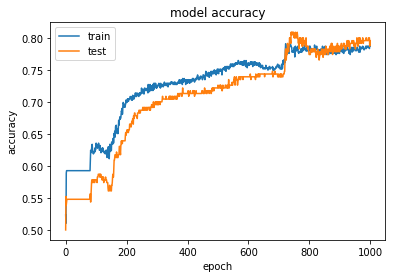

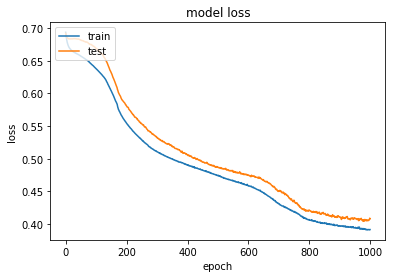

In [121]:
# summarize history for accuracy
plt.plot(history48.history['accuracy'])
plt.plot(history48.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history48.history['loss'])
plt.plot(history48.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model with hidden nodes as 4, 12

### Training

In [115]:
model412 = keras.Sequential()
model412.add(Dense(4, input_dim=2, activation="relu"))
model412.add(Dense(12, activation="relu"))
model412.add(Dense(2, activation="softmax"))

model412.compile(optimizer='Nadam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history412 = model412.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=40)

Epoch 1/1000
14/14 [==============================] - 1s 8ms/step - loss: 0.7005 - accuracy: 0.4598 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 2/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4897 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 3/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5346 - val_loss: 0.6916 - val_accuracy: 0.5130
Epoch 4/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5346 - val_loss: 0.6895 - val_accuracy: 0.5304
Epoch 5/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5925 - val_loss: 0.6883 - val_accuracy: 0.5478
Epoch 6/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5925 - val_loss: 0.6873 - val_accuracy: 0.5478
Epoch 7/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5925 - val_loss: 0.6867 - val_accuracy: 0.5478
Epoch 

14/14 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6168 - val_loss: 0.6690 - val_accuracy: 0.5565
Epoch 59/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.6131 - val_loss: 0.6691 - val_accuracy: 0.5609
Epoch 60/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.6112 - val_loss: 0.6686 - val_accuracy: 0.5522
Epoch 61/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.6112 - val_loss: 0.6677 - val_accuracy: 0.5435
Epoch 62/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.6112 - val_loss: 0.6671 - val_accuracy: 0.5391
Epoch 63/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.6150 - val_loss: 0.6666 - val_accuracy: 0.5391
Epoch 64/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.6206 - val_loss: 0.6660 - val_accuracy: 0.5391
Epoch 65/1000

Epoch 115/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.5607 - val_loss: 0.6342 - val_accuracy: 0.4957
Epoch 116/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.5570 - val_loss: 0.6332 - val_accuracy: 0.5087
Epoch 117/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5961 - accuracy: 0.5607 - val_loss: 0.6315 - val_accuracy: 0.5130
Epoch 118/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5953 - accuracy: 0.5607 - val_loss: 0.6301 - val_accuracy: 0.5174
Epoch 119/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.5607 - val_loss: 0.6293 - val_accuracy: 0.5174
Epoch 120/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.5664 - val_loss: 0.6286 - val_accuracy: 0.5174
Epoch 121/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.5626 - val_loss: 0.6279 - val_accuracy:

Epoch 172/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5530 - accuracy: 0.5850 - val_loss: 0.5798 - val_accuracy: 0.5739
Epoch 173/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5525 - accuracy: 0.6000 - val_loss: 0.5787 - val_accuracy: 0.5783
Epoch 174/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.5869 - val_loss: 0.5781 - val_accuracy: 0.5783
Epoch 175/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.6000 - val_loss: 0.5771 - val_accuracy: 0.5826
Epoch 176/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.6000 - val_loss: 0.5763 - val_accuracy: 0.5870
Epoch 177/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.6037 - val_loss: 0.5753 - val_accuracy: 0.5957
Epoch 178/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.6019 - val_loss: 0.5742 - val_accuracy:

Epoch 229/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.6710 - val_loss: 0.5410 - val_accuracy: 0.6870
Epoch 230/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5198 - accuracy: 0.6692 - val_loss: 0.5405 - val_accuracy: 0.6870
Epoch 231/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.6785 - val_loss: 0.5395 - val_accuracy: 0.6957
Epoch 232/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.6879 - val_loss: 0.5390 - val_accuracy: 0.6913
Epoch 233/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.6710 - val_loss: 0.5388 - val_accuracy: 0.6870
Epoch 234/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.6748 - val_loss: 0.5382 - val_accuracy: 0.6913
Epoch 235/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.6822 - val_loss: 0.5376 - val_accuracy:

Epoch 286/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.7140 - val_loss: 0.5141 - val_accuracy: 0.7217
Epoch 287/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.7234 - val_loss: 0.5134 - val_accuracy: 0.7217
Epoch 288/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.7234 - val_loss: 0.5132 - val_accuracy: 0.7217
Epoch 289/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4950 - accuracy: 0.7103 - val_loss: 0.5127 - val_accuracy: 0.7261
Epoch 290/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7215 - val_loss: 0.5121 - val_accuracy: 0.7261
Epoch 291/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.7196 - val_loss: 0.5116 - val_accuracy: 0.7261
Epoch 292/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.7252 - val_loss: 0.5108 - val_accuracy:

Epoch 399/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.7551 - val_loss: 0.4767 - val_accuracy: 0.7435
Epoch 400/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.7533 - val_loss: 0.4765 - val_accuracy: 0.7435
Epoch 401/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.7514 - val_loss: 0.4762 - val_accuracy: 0.7435
Epoch 402/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.7570 - val_loss: 0.4760 - val_accuracy: 0.7435
Epoch 403/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.7514 - val_loss: 0.4759 - val_accuracy: 0.7348
Epoch 404/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4613 - accuracy: 0.7533 - val_loss: 0.4755 - val_accuracy: 0.7348
Epoch 405/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.7570 - val_loss: 0.4753 - val_accuracy:

Epoch 456/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.7720 - val_loss: 0.4609 - val_accuracy: 0.7565
Epoch 457/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.7682 - val_loss: 0.4609 - val_accuracy: 0.7565
Epoch 458/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.7645 - val_loss: 0.4609 - val_accuracy: 0.7522
Epoch 459/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4442 - accuracy: 0.7664 - val_loss: 0.4603 - val_accuracy: 0.7565
Epoch 460/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.7720 - val_loss: 0.4599 - val_accuracy: 0.7565
Epoch 461/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.7645 - val_loss: 0.4600 - val_accuracy: 0.7565
Epoch 462/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.7720 - val_loss: 0.4594 - val_accuracy:

Epoch 569/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.7813 - val_loss: 0.4401 - val_accuracy: 0.7652
Epoch 570/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.7776 - val_loss: 0.4398 - val_accuracy: 0.7652
Epoch 571/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.7757 - val_loss: 0.4389 - val_accuracy: 0.7652
Epoch 572/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.7813 - val_loss: 0.4386 - val_accuracy: 0.7652
Epoch 573/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.7832 - val_loss: 0.4387 - val_accuracy: 0.7696
Epoch 574/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.7813 - val_loss: 0.4390 - val_accuracy: 0.7652
Epoch 575/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.7794 - val_loss: 0.4394 - val_accuracy:

Epoch 626/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.7813 - val_loss: 0.4299 - val_accuracy: 0.7696
Epoch 627/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.7794 - val_loss: 0.4295 - val_accuracy: 0.7696
Epoch 628/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.7794 - val_loss: 0.4296 - val_accuracy: 0.7696
Epoch 629/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.7813 - val_loss: 0.4302 - val_accuracy: 0.7696
Epoch 630/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.7776 - val_loss: 0.4298 - val_accuracy: 0.7696
Epoch 631/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.7813 - val_loss: 0.4282 - val_accuracy: 0.7696
Epoch 632/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.7794 - val_loss: 0.4289 - val_accuracy:

Epoch 683/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.7813 - val_loss: 0.4144 - val_accuracy: 0.7739
Epoch 684/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.7776 - val_loss: 0.4142 - val_accuracy: 0.7739
Epoch 685/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.7794 - val_loss: 0.4144 - val_accuracy: 0.7783
Epoch 686/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.7794 - val_loss: 0.4132 - val_accuracy: 0.7783
Epoch 687/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.7794 - val_loss: 0.4141 - val_accuracy: 0.7783
Epoch 688/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.7776 - val_loss: 0.4131 - val_accuracy: 0.7783
Epoch 689/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.7776 - val_loss: 0.4128 - val_accuracy:

Epoch 796/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.7421 - val_loss: 0.3761 - val_accuracy: 0.7435
Epoch 797/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.7383 - val_loss: 0.3761 - val_accuracy: 0.7391
Epoch 798/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.7308 - val_loss: 0.3774 - val_accuracy: 0.7261
Epoch 799/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.7327 - val_loss: 0.3761 - val_accuracy: 0.7217
Epoch 800/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.7346 - val_loss: 0.3750 - val_accuracy: 0.7217
Epoch 801/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.7327 - val_loss: 0.3756 - val_accuracy: 0.7261
Epoch 802/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.7327 - val_loss: 0.3761 - val_accuracy:

Epoch 853/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.7327 - val_loss: 0.3620 - val_accuracy: 0.7696
Epoch 854/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.7252 - val_loss: 0.3613 - val_accuracy: 0.7696
Epoch 855/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.7252 - val_loss: 0.3614 - val_accuracy: 0.7696
Epoch 856/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.7271 - val_loss: 0.3615 - val_accuracy: 0.7652
Epoch 857/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.7327 - val_loss: 0.3623 - val_accuracy: 0.7696
Epoch 858/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.7234 - val_loss: 0.3625 - val_accuracy: 0.7696
Epoch 859/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.7252 - val_loss: 0.3611 - val_accuracy:

Epoch 910/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.7664 - val_loss: 0.3496 - val_accuracy: 0.8000
Epoch 911/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.7664 - val_loss: 0.3507 - val_accuracy: 0.8000
Epoch 912/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.7645 - val_loss: 0.3476 - val_accuracy: 0.7957
Epoch 913/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.7645 - val_loss: 0.3480 - val_accuracy: 0.8000
Epoch 914/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.7682 - val_loss: 0.3483 - val_accuracy: 0.7957
Epoch 915/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.7701 - val_loss: 0.3469 - val_accuracy: 0.7957
Epoch 916/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.7664 - val_loss: 0.3463 - val_accuracy:

Epoch 967/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8187 - val_loss: 0.3247 - val_accuracy: 0.8609
Epoch 968/1000
14/14 [==============================] - ETA: 0s - loss: 0.3332 - accuracy: 0.80 - 0s 2ms/step - loss: 0.3263 - accuracy: 0.8187 - val_loss: 0.3239 - val_accuracy: 0.8609
Epoch 969/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8168 - val_loss: 0.3226 - val_accuracy: 0.8565
Epoch 970/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8168 - val_loss: 0.3226 - val_accuracy: 0.8565
Epoch 971/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8187 - val_loss: 0.3231 - val_accuracy: 0.8609
Epoch 972/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8150 - val_loss: 0.3237 - val_accuracy: 0.8609
Epoch 973/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy:

### Evaluation

In [82]:
test_loss, test_acc = model412.evaluate(X_test, y_test)
print('Test accuracy: 4, 12 :', test_acc)

8/8 [==============================] - 0s 762us/step - loss: 0.4111 - accuracy: 0.7957
Test accuracy: 4, 12 : 0.7956521511077881


### Accuracy and Loss Plots

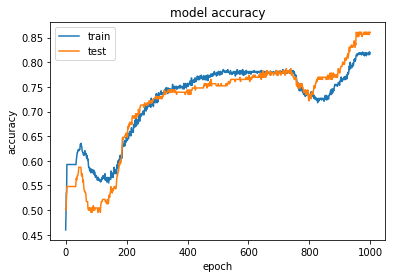

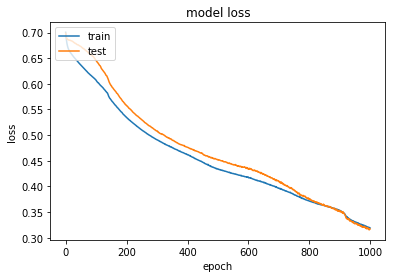

In [120]:
# summarize history for accuracy
plt.plot(history412.history['accuracy'])
plt.plot(history412.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history412.history['loss'])
plt.plot(history412.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model with hidden nodes as 4, 16

### Training

In [116]:
model416 = keras.Sequential()
model416.add(Dense(4, input_dim=2, activation="relu"))
model416.add(Dense(16, activation="relu"))
model416.add(Dense(2, activation="softmax"))

model416.compile(optimizer='Nadam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history416 = model416.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=40)

Epoch 1/1000
14/14 [==============================] - 1s 8ms/step - loss: 0.6921 - accuracy: 0.4991 - val_loss: 0.6920 - val_accuracy: 0.4870
Epoch 2/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5178 - val_loss: 0.6898 - val_accuracy: 0.5261
Epoch 3/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5551 - val_loss: 0.6880 - val_accuracy: 0.5478
Epoch 4/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5925 - val_loss: 0.6868 - val_accuracy: 0.5478
Epoch 5/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.5925 - val_loss: 0.6859 - val_accuracy: 0.5478
Epoch 6/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5925 - val_loss: 0.6853 - val_accuracy: 0.5478
Epoch 7/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5925 - val_loss: 0.6848 - val_accuracy: 0.5478
Epoch 

Epoch 115/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.5626 - val_loss: 0.6195 - val_accuracy: 0.5348
Epoch 116/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.5776 - val_loss: 0.6181 - val_accuracy: 0.5435
Epoch 117/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 0.5757 - val_loss: 0.6166 - val_accuracy: 0.5522
Epoch 118/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.5776 - val_loss: 0.6155 - val_accuracy: 0.5565
Epoch 119/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.5832 - val_loss: 0.6141 - val_accuracy: 0.5565
Epoch 120/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.5850 - val_loss: 0.6127 - val_accuracy: 0.5609
Epoch 121/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.5869 - val_loss: 0.6111 - val_accuracy:

Epoch 228/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7570 - val_loss: 0.5054 - val_accuracy: 0.7391
Epoch 229/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7551 - val_loss: 0.5047 - val_accuracy: 0.7391
Epoch 230/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.7477 - val_loss: 0.5037 - val_accuracy: 0.7435
Epoch 231/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7682 - val_loss: 0.5029 - val_accuracy: 0.7435
Epoch 232/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7682 - val_loss: 0.5025 - val_accuracy: 0.7435
Epoch 233/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7626 - val_loss: 0.5020 - val_accuracy: 0.7435
Epoch 234/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.7664 - val_loss: 0.5015 - val_accuracy:

Epoch 285/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.7720 - val_loss: 0.4722 - val_accuracy: 0.7565
Epoch 286/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.7757 - val_loss: 0.4718 - val_accuracy: 0.7565
Epoch 287/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4459 - accuracy: 0.7738 - val_loss: 0.4713 - val_accuracy: 0.7565
Epoch 288/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.7757 - val_loss: 0.4708 - val_accuracy: 0.7565
Epoch 289/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.7738 - val_loss: 0.4706 - val_accuracy: 0.7565
Epoch 290/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.7757 - val_loss: 0.4701 - val_accuracy: 0.7522
Epoch 291/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4442 - accuracy: 0.7757 - val_loss: 0.4698 - val_accuracy:

Epoch 342/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.7776 - val_loss: 0.4497 - val_accuracy: 0.7609
Epoch 343/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.7794 - val_loss: 0.4487 - val_accuracy: 0.7696
Epoch 344/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.7794 - val_loss: 0.4483 - val_accuracy: 0.7696
Epoch 345/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.7813 - val_loss: 0.4473 - val_accuracy: 0.7739
Epoch 346/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.7832 - val_loss: 0.4471 - val_accuracy: 0.7739
Epoch 347/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.7794 - val_loss: 0.4468 - val_accuracy: 0.7739
Epoch 348/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.7832 - val_loss: 0.4461 - val_accuracy:

14/14 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.7832 - val_loss: 0.4060 - val_accuracy: 0.7870
Epoch 455/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.7907 - val_loss: 0.4062 - val_accuracy: 0.7870
Epoch 456/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.7850 - val_loss: 0.4063 - val_accuracy: 0.7826
Epoch 457/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.7888 - val_loss: 0.4053 - val_accuracy: 0.7870
Epoch 458/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.7907 - val_loss: 0.4056 - val_accuracy: 0.7826
Epoch 459/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.7832 - val_loss: 0.4051 - val_accuracy: 0.7870
Epoch 460/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.7907 - val_loss: 0.4041 - val_accuracy: 0.7870
Epoch 4

Epoch 567/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.7738 - val_loss: 0.3654 - val_accuracy: 0.7957
Epoch 568/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.7720 - val_loss: 0.3647 - val_accuracy: 0.7957
Epoch 569/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.7701 - val_loss: 0.3641 - val_accuracy: 0.7957
Epoch 570/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.7720 - val_loss: 0.3638 - val_accuracy: 0.7913
Epoch 571/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.7720 - val_loss: 0.3640 - val_accuracy: 0.7913
Epoch 572/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.7757 - val_loss: 0.3638 - val_accuracy: 0.7913
Epoch 573/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.7738 - val_loss: 0.3631 - val_accuracy:

14/14 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8075 - val_loss: 0.3252 - val_accuracy: 0.8348
Epoch 680/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8093 - val_loss: 0.3252 - val_accuracy: 0.8348
Epoch 681/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.3248 - accuracy: 0.8093 - val_loss: 0.3248 - val_accuracy: 0.8348
Epoch 682/1000
14/14 [==============================] - ETA: 0s - loss: 0.3104 - accuracy: 0.85 - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8168 - val_loss: 0.3243 - val_accuracy: 0.8391
Epoch 683/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8168 - val_loss: 0.3232 - val_accuracy: 0.8391
Epoch 684/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8150 - val_loss: 0.3233 - val_accuracy: 0.8391
Epoch 685/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8131 - val_l

Epoch 736/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8206 - val_loss: 0.3055 - val_accuracy: 0.8478
Epoch 737/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8206 - val_loss: 0.3058 - val_accuracy: 0.8478
Epoch 738/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8243 - val_loss: 0.3058 - val_accuracy: 0.8435
Epoch 739/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8187 - val_loss: 0.3054 - val_accuracy: 0.8435
Epoch 740/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.8206 - val_loss: 0.3043 - val_accuracy: 0.8435
Epoch 741/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.3068 - accuracy: 0.8224 - val_loss: 0.3041 - val_accuracy: 0.8478
Epoch 742/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.8206 - val_loss: 0.3046 - val_accuracy:

14/14 [==============================] - 0s 2ms/step - loss: 0.2822 - accuracy: 0.8486 - val_loss: 0.2791 - val_accuracy: 0.8783
Epoch 849/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2818 - accuracy: 0.8486 - val_loss: 0.2785 - val_accuracy: 0.8783
Epoch 850/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2823 - accuracy: 0.8505 - val_loss: 0.2789 - val_accuracy: 0.8783
Epoch 851/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2818 - accuracy: 0.8486 - val_loss: 0.2781 - val_accuracy: 0.8826
Epoch 852/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2813 - accuracy: 0.8467 - val_loss: 0.2785 - val_accuracy: 0.8826
Epoch 853/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2811 - accuracy: 0.8467 - val_loss: 0.2782 - val_accuracy: 0.8826
Epoch 854/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2810 - accuracy: 0.8523 - val_loss: 0.2788 - val_accuracy: 0.8826
Epoch 8

Epoch 905/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2700 - accuracy: 0.8579 - val_loss: 0.2677 - val_accuracy: 0.8913
Epoch 906/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.8542 - val_loss: 0.2675 - val_accuracy: 0.8870
Epoch 907/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2694 - accuracy: 0.8542 - val_loss: 0.2669 - val_accuracy: 0.8913
Epoch 908/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.8561 - val_loss: 0.2669 - val_accuracy: 0.8913
Epoch 909/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.8579 - val_loss: 0.2680 - val_accuracy: 0.8913
Epoch 910/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.8561 - val_loss: 0.2670 - val_accuracy: 0.8913
Epoch 911/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2689 - accuracy: 0.8542 - val_loss: 0.2661 - val_accuracy:

### Evaluation

In [80]:
test_loss, test_acc = model416.evaluate(X_test, y_test)
print('Test accuracy: 4, 16 :', test_acc)

8/8 [==============================] - 0s 1ms/step - loss: 0.2510 - accuracy: 0.8870
Test accuracy: 4, 16 : 0.886956512928009


### Accuracy and Loss Plots

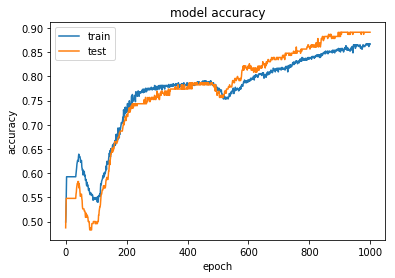

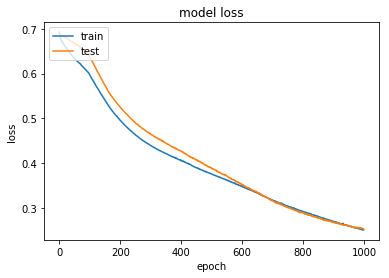

In [119]:
# summarize history for accuracy
plt.plot(history416.history['accuracy'])
plt.plot(history416.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history416.history['loss'])
plt.plot(history416.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model with hidden nodes as 8, 12

### Training

In [117]:
model812 = keras.Sequential()
model812.add(Dense(8, input_dim=2, activation="relu"))
model812.add(Dense(12, activation="relu"))
model812.add(Dense(2, activation="softmax"))

model812.compile(optimizer='Nadam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history812 = model812.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=40)

Epoch 1/1000
14/14 [==============================] - 1s 7ms/step - loss: 0.6768 - accuracy: 0.5757 - val_loss: 0.6841 - val_accuracy: 0.5478
Epoch 2/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.5925 - val_loss: 0.6822 - val_accuracy: 0.5478
Epoch 3/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.5925 - val_loss: 0.6808 - val_accuracy: 0.5478
Epoch 4/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.5925 - val_loss: 0.6799 - val_accuracy: 0.5478
Epoch 5/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.5925 - val_loss: 0.6793 - val_accuracy: 0.5478
Epoch 6/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5925 - val_loss: 0.6788 - val_accuracy: 0.5478
Epoch 7/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.5925 - val_loss: 0.6785 - val_accuracy: 0.5478
Epoch 

14/14 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.5869 - val_loss: 0.6544 - val_accuracy: 0.5043
Epoch 59/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6209 - accuracy: 0.5907 - val_loss: 0.6535 - val_accuracy: 0.5043
Epoch 60/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.5850 - val_loss: 0.6524 - val_accuracy: 0.4913
Epoch 61/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.5757 - val_loss: 0.6514 - val_accuracy: 0.4783
Epoch 62/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.5757 - val_loss: 0.6512 - val_accuracy: 0.4739
Epoch 63/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.5738 - val_loss: 0.6508 - val_accuracy: 0.4739
Epoch 64/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.5738 - val_loss: 0.6501 - val_accuracy: 0.4739
Epoch 65/1000

Epoch 172/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4557 - accuracy: 0.7645 - val_loss: 0.4789 - val_accuracy: 0.7478
Epoch 173/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.7645 - val_loss: 0.4776 - val_accuracy: 0.7565
Epoch 174/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7664 - val_loss: 0.4764 - val_accuracy: 0.7522
Epoch 175/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.7645 - val_loss: 0.4759 - val_accuracy: 0.7478
Epoch 176/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.7645 - val_loss: 0.4751 - val_accuracy: 0.7522
Epoch 177/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.7626 - val_loss: 0.4741 - val_accuracy: 0.7652
Epoch 178/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.7720 - val_loss: 0.4733 - val_accuracy:

Epoch 285/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.7944 - val_loss: 0.4279 - val_accuracy: 0.7913
Epoch 286/1000
14/14 [==============================] - ETA: 0s - loss: 0.5191 - accuracy: 0.67 - 0s 2ms/step - loss: 0.3985 - accuracy: 0.7963 - val_loss: 0.4277 - val_accuracy: 0.7913
Epoch 287/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.7963 - val_loss: 0.4279 - val_accuracy: 0.7870
Epoch 288/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.7907 - val_loss: 0.4274 - val_accuracy: 0.7870
Epoch 289/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.7963 - val_loss: 0.4272 - val_accuracy: 0.7870
Epoch 290/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.7944 - val_loss: 0.4267 - val_accuracy: 0.7870
Epoch 291/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy:

14/14 [==============================] - 0s 2ms/step - loss: 0.3816 - accuracy: 0.7981 - val_loss: 0.4113 - val_accuracy: 0.7957
Epoch 342/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8037 - val_loss: 0.4105 - val_accuracy: 0.8000
Epoch 343/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.7981 - val_loss: 0.4116 - val_accuracy: 0.7957
Epoch 344/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.7963 - val_loss: 0.4114 - val_accuracy: 0.8000
Epoch 345/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8000 - val_loss: 0.4104 - val_accuracy: 0.8000
Epoch 346/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.7981 - val_loss: 0.4100 - val_accuracy: 0.8000
Epoch 347/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.8037 - val_loss: 0.4090 - val_accuracy: 0.7957
Epoch 3

Epoch 398/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8075 - val_loss: 0.3847 - val_accuracy: 0.8000
Epoch 399/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.3565 - accuracy: 0.8037 - val_loss: 0.3840 - val_accuracy: 0.8000
Epoch 400/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.3555 - accuracy: 0.8075 - val_loss: 0.3830 - val_accuracy: 0.8000
Epoch 401/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.3554 - accuracy: 0.8056 - val_loss: 0.3819 - val_accuracy: 0.8000
Epoch 402/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8075 - val_loss: 0.3816 - val_accuracy: 0.8000
Epoch 403/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8056 - val_loss: 0.3806 - val_accuracy: 0.8000
Epoch 404/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8056 - val_loss: 0.3799 - val_accuracy:

Epoch 455/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8112 - val_loss: 0.3474 - val_accuracy: 0.8043
Epoch 456/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8131 - val_loss: 0.3475 - val_accuracy: 0.8043
Epoch 457/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8131 - val_loss: 0.3466 - val_accuracy: 0.8043
Epoch 458/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8112 - val_loss: 0.3457 - val_accuracy: 0.8043
Epoch 459/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8131 - val_loss: 0.3449 - val_accuracy: 0.8043
Epoch 460/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8131 - val_loss: 0.3441 - val_accuracy: 0.8043
Epoch 461/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8187 - val_loss: 0.3449 - val_accuracy:

Epoch 512/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.8542 - val_loss: 0.3181 - val_accuracy: 0.8565
Epoch 513/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.8561 - val_loss: 0.3159 - val_accuracy: 0.8652
Epoch 514/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2921 - accuracy: 0.8561 - val_loss: 0.3161 - val_accuracy: 0.8652
Epoch 515/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2921 - accuracy: 0.8617 - val_loss: 0.3163 - val_accuracy: 0.8609
Epoch 516/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.8598 - val_loss: 0.3150 - val_accuracy: 0.8565
Epoch 517/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2907 - accuracy: 0.8579 - val_loss: 0.3147 - val_accuracy: 0.8652
Epoch 518/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.8579 - val_loss: 0.3137 - val_accuracy:

14/14 [==============================] - 0s 2ms/step - loss: 0.2710 - accuracy: 0.8841 - val_loss: 0.2924 - val_accuracy: 0.8957
Epoch 569/1000
14/14 [==============================] - ETA: 0s - loss: 0.2469 - accuracy: 0.90 - 0s 2ms/step - loss: 0.2713 - accuracy: 0.8804 - val_loss: 0.2935 - val_accuracy: 0.8870
Epoch 570/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2700 - accuracy: 0.8841 - val_loss: 0.2951 - val_accuracy: 0.8826
Epoch 571/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2700 - accuracy: 0.8860 - val_loss: 0.2941 - val_accuracy: 0.8826
Epoch 572/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2696 - accuracy: 0.8860 - val_loss: 0.2931 - val_accuracy: 0.8826
Epoch 573/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2697 - accuracy: 0.8822 - val_loss: 0.2920 - val_accuracy: 0.8870
Epoch 574/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2689 - accuracy: 0.8822 - val_l

Epoch 625/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.8916 - val_loss: 0.2778 - val_accuracy: 0.8739
Epoch 626/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.8916 - val_loss: 0.2795 - val_accuracy: 0.8696
Epoch 627/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.8935 - val_loss: 0.2773 - val_accuracy: 0.8696
Epoch 628/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.8916 - val_loss: 0.2754 - val_accuracy: 0.8696
Epoch 629/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 0.8935 - val_loss: 0.2758 - val_accuracy: 0.8696
Epoch 630/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.8953 - val_loss: 0.2758 - val_accuracy: 0.8696
Epoch 631/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2531 - accuracy: 0.8935 - val_loss: 0.2763 - val_accuracy:

Epoch 682/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2424 - accuracy: 0.8766 - val_loss: 0.2655 - val_accuracy: 0.8739
Epoch 683/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.8785 - val_loss: 0.2652 - val_accuracy: 0.8739
Epoch 684/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2420 - accuracy: 0.8841 - val_loss: 0.2645 - val_accuracy: 0.8739
Epoch 685/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.8785 - val_loss: 0.2634 - val_accuracy: 0.8739
Epoch 686/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.8822 - val_loss: 0.2648 - val_accuracy: 0.8739
Epoch 687/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.8766 - val_loss: 0.2641 - val_accuracy: 0.8739
Epoch 688/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.8766 - val_loss: 0.2636 - val_accuracy:

Epoch 739/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2339 - accuracy: 0.8785 - val_loss: 0.2556 - val_accuracy: 0.8739
Epoch 740/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.8785 - val_loss: 0.2565 - val_accuracy: 0.8696
Epoch 741/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2326 - accuracy: 0.8785 - val_loss: 0.2573 - val_accuracy: 0.8696
Epoch 742/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2326 - accuracy: 0.8748 - val_loss: 0.2579 - val_accuracy: 0.8696
Epoch 743/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.8822 - val_loss: 0.2560 - val_accuracy: 0.8696
Epoch 744/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.8785 - val_loss: 0.2550 - val_accuracy: 0.8696
Epoch 745/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.8804 - val_loss: 0.2550 - val_accuracy:

Epoch 796/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.8804 - val_loss: 0.2477 - val_accuracy: 0.8696
Epoch 797/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2247 - accuracy: 0.8804 - val_loss: 0.2471 - val_accuracy: 0.8696
Epoch 798/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2250 - accuracy: 0.8785 - val_loss: 0.2466 - val_accuracy: 0.8696
Epoch 799/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2248 - accuracy: 0.8822 - val_loss: 0.2466 - val_accuracy: 0.8696
Epoch 800/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.8785 - val_loss: 0.2465 - val_accuracy: 0.8739
Epoch 801/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.8804 - val_loss: 0.2473 - val_accuracy: 0.8739
Epoch 802/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2245 - accuracy: 0.8822 - val_loss: 0.2464 - val_accuracy:

Epoch 853/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.8822 - val_loss: 0.2411 - val_accuracy: 0.8652
Epoch 854/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.8785 - val_loss: 0.2395 - val_accuracy: 0.8696
Epoch 855/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2190 - accuracy: 0.8841 - val_loss: 0.2387 - val_accuracy: 0.8696
Epoch 856/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.8841 - val_loss: 0.2402 - val_accuracy: 0.8652
Epoch 857/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.8841 - val_loss: 0.2395 - val_accuracy: 0.8652
Epoch 858/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2182 - accuracy: 0.8822 - val_loss: 0.2380 - val_accuracy: 0.8652
Epoch 859/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2192 - accuracy: 0.8841 - val_loss: 0.2380 - val_accuracy:

Epoch 910/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.8822 - val_loss: 0.2353 - val_accuracy: 0.8696
Epoch 911/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.8841 - val_loss: 0.2345 - val_accuracy: 0.8696
Epoch 912/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2140 - accuracy: 0.8822 - val_loss: 0.2346 - val_accuracy: 0.8696
Epoch 913/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2137 - accuracy: 0.8841 - val_loss: 0.2335 - val_accuracy: 0.8696
Epoch 914/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.8841 - val_loss: 0.2345 - val_accuracy: 0.8696
Epoch 915/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.8841 - val_loss: 0.2347 - val_accuracy: 0.8696
Epoch 916/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.8841 - val_loss: 0.2339 - val_accuracy:

### Evaluation

In [76]:
test_loss, test_acc = model812.evaluate(X_test, y_test)
print('Test accuracy: 8, 12 :', test_acc)

8/8 [==============================] - 0s 787us/step - loss: 0.1693 - accuracy: 0.9478
Test accuracy: 8, 12 : 0.947826087474823


### Accuracy and Loss Plots

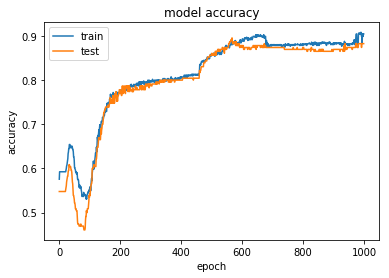

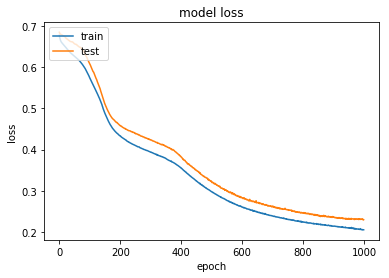

In [118]:
# summarize history for accuracy
plt.plot(history812.history['accuracy'])
plt.plot(history812.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history812.history['loss'])
plt.plot(history812.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model with hidden nodes as 8, 16

### Training

In [112]:
model816 = keras.Sequential()
model816.add(Dense(8, input_dim=2, activation="relu"))
model816.add(Dense(16, activation="relu"))
model816.add(Dense(2, activation="softmax"))

model816.compile(optimizer='Nadam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history816 = model816.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=40)

Epoch 1/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.5252 - val_loss: 0.6923 - val_accuracy: 0.5087
Epoch 2/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5869 - val_loss: 0.6893 - val_accuracy: 0.5478
Epoch 3/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5925 - val_loss: 0.6868 - val_accuracy: 0.5478
Epoch 4/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5925 - val_loss: 0.6848 - val_accuracy: 0.5478
Epoch 5/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.5925 - val_loss: 0.6833 - val_accuracy: 0.5478
Epoch 6/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.5925 - val_loss: 0.6823 - val_accuracy: 0.5478
Epoch 7/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.5925 - val_loss: 0.6817 - val_accuracy: 0.5478
Epoch 

14/14 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7252 - val_loss: 0.5107 - val_accuracy: 0.7304
Epoch 116/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7290 - val_loss: 0.5086 - val_accuracy: 0.7391
Epoch 117/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7327 - val_loss: 0.5068 - val_accuracy: 0.7391
Epoch 118/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7346 - val_loss: 0.5053 - val_accuracy: 0.7391
Epoch 119/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7327 - val_loss: 0.5035 - val_accuracy: 0.7391
Epoch 120/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7346 - val_loss: 0.5020 - val_accuracy: 0.7435
Epoch 121/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7327 - val_loss: 0.5004 - val_accuracy: 0.7391
Epoch 1

Epoch 172/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.7738 - val_loss: 0.4551 - val_accuracy: 0.7652
Epoch 173/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.7813 - val_loss: 0.4546 - val_accuracy: 0.7696
Epoch 174/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.7813 - val_loss: 0.4543 - val_accuracy: 0.7652
Epoch 175/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.7813 - val_loss: 0.4535 - val_accuracy: 0.7696
Epoch 176/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.7832 - val_loss: 0.4530 - val_accuracy: 0.7696
Epoch 177/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.7832 - val_loss: 0.4531 - val_accuracy: 0.7652
Epoch 178/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.7738 - val_loss: 0.4524 - val_accuracy:

Epoch 229/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8000 - val_loss: 0.4082 - val_accuracy: 0.7913
Epoch 230/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8019 - val_loss: 0.4085 - val_accuracy: 0.7870
Epoch 231/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.7981 - val_loss: 0.4071 - val_accuracy: 0.7913
Epoch 232/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.7701 - val_loss: 0.4057 - val_accuracy: 0.7478
Epoch 233/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.7570 - val_loss: 0.4052 - val_accuracy: 0.7478
Epoch 234/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.7477 - val_loss: 0.4048 - val_accuracy: 0.7435
Epoch 235/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.7477 - val_loss: 0.4033 - val_accuracy:

Epoch 286/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8187 - val_loss: 0.3558 - val_accuracy: 0.8522
Epoch 287/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8187 - val_loss: 0.3540 - val_accuracy: 0.8565
Epoch 288/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8224 - val_loss: 0.3528 - val_accuracy: 0.8522
Epoch 289/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8224 - val_loss: 0.3516 - val_accuracy: 0.8565
Epoch 290/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8224 - val_loss: 0.3511 - val_accuracy: 0.8609
Epoch 291/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3379 - accuracy: 0.8224 - val_loss: 0.3503 - val_accuracy: 0.8609
Epoch 292/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8206 - val_loss: 0.3496 - val_accuracy:

Epoch 343/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8505 - val_loss: 0.3232 - val_accuracy: 0.8652
Epoch 344/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8505 - val_loss: 0.3213 - val_accuracy: 0.8696
Epoch 345/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8467 - val_loss: 0.3209 - val_accuracy: 0.8739
Epoch 346/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8523 - val_loss: 0.3210 - val_accuracy: 0.8739
Epoch 347/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8467 - val_loss: 0.3201 - val_accuracy: 0.8696
Epoch 348/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3070 - accuracy: 0.8486 - val_loss: 0.3198 - val_accuracy: 0.8696
Epoch 349/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8467 - val_loss: 0.3185 - val_accuracy:

Epoch 400/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.8561 - val_loss: 0.2961 - val_accuracy: 0.8870
Epoch 401/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.8542 - val_loss: 0.2956 - val_accuracy: 0.8957
Epoch 402/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.8579 - val_loss: 0.2950 - val_accuracy: 0.8957
Epoch 403/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2848 - accuracy: 0.8561 - val_loss: 0.2951 - val_accuracy: 0.8957
Epoch 404/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2846 - accuracy: 0.8542 - val_loss: 0.2948 - val_accuracy: 0.8957
Epoch 405/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2844 - accuracy: 0.8561 - val_loss: 0.2943 - val_accuracy: 0.8913
Epoch 406/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2838 - accuracy: 0.8561 - val_loss: 0.2936 - val_accuracy:

Epoch 457/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.8636 - val_loss: 0.2765 - val_accuracy: 0.9000
Epoch 458/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.8579 - val_loss: 0.2761 - val_accuracy: 0.9000
Epoch 459/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2683 - accuracy: 0.8598 - val_loss: 0.2759 - val_accuracy: 0.8957
Epoch 460/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.8598 - val_loss: 0.2756 - val_accuracy: 0.9000
Epoch 461/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 0.8598 - val_loss: 0.2751 - val_accuracy: 0.9000
Epoch 462/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.8598 - val_loss: 0.2751 - val_accuracy: 0.8957
Epoch 463/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.8579 - val_loss: 0.2742 - val_accuracy:

Epoch 570/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.8710 - val_loss: 0.2527 - val_accuracy: 0.9000
Epoch 571/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.8692 - val_loss: 0.2528 - val_accuracy: 0.9000
Epoch 572/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.8692 - val_loss: 0.2529 - val_accuracy: 0.8957
Epoch 573/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.8692 - val_loss: 0.2527 - val_accuracy: 0.8957
Epoch 574/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.8729 - val_loss: 0.2530 - val_accuracy: 0.9000
Epoch 575/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.8729 - val_loss: 0.2522 - val_accuracy: 0.9000
Epoch 576/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.8729 - val_loss: 0.2519 - val_accuracy:

Epoch 627/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.8766 - val_loss: 0.2458 - val_accuracy: 0.9000
Epoch 628/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2388 - accuracy: 0.8804 - val_loss: 0.2459 - val_accuracy: 0.9000
Epoch 629/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.8766 - val_loss: 0.2460 - val_accuracy: 0.9000
Epoch 630/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.8729 - val_loss: 0.2456 - val_accuracy: 0.9000
Epoch 631/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.8748 - val_loss: 0.2455 - val_accuracy: 0.9000
Epoch 632/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2383 - accuracy: 0.8729 - val_loss: 0.2450 - val_accuracy: 0.9000
Epoch 633/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.8748 - val_loss: 0.2449 - val_accuracy:

Epoch 684/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.8841 - val_loss: 0.2418 - val_accuracy: 0.9000
Epoch 685/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.8822 - val_loss: 0.2415 - val_accuracy: 0.9000
Epoch 686/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.8841 - val_loss: 0.2410 - val_accuracy: 0.9000
Epoch 687/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.8822 - val_loss: 0.2399 - val_accuracy: 0.9000
Epoch 688/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.8804 - val_loss: 0.2405 - val_accuracy: 0.9000
Epoch 689/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.8766 - val_loss: 0.2406 - val_accuracy: 0.9000
Epoch 690/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.8766 - val_loss: 0.2404 - val_accuracy:

Epoch 741/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.8822 - val_loss: 0.2378 - val_accuracy: 0.9043
Epoch 742/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.8841 - val_loss: 0.2375 - val_accuracy: 0.9043
Epoch 743/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2258 - accuracy: 0.8822 - val_loss: 0.2381 - val_accuracy: 0.9043
Epoch 744/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.8841 - val_loss: 0.2385 - val_accuracy: 0.9043
Epoch 745/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.8841 - val_loss: 0.2384 - val_accuracy: 0.9043
Epoch 746/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.8822 - val_loss: 0.2369 - val_accuracy: 0.9043
Epoch 747/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 0.8822 - val_loss: 0.2369 - val_accuracy:

Epoch 798/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2214 - accuracy: 0.8860 - val_loss: 0.2351 - val_accuracy: 0.9043
Epoch 799/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.8860 - val_loss: 0.2346 - val_accuracy: 0.9043
Epoch 800/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.8860 - val_loss: 0.2350 - val_accuracy: 0.9043
Epoch 801/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.8860 - val_loss: 0.2346 - val_accuracy: 0.9043
Epoch 802/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2211 - accuracy: 0.8879 - val_loss: 0.2350 - val_accuracy: 0.9043
Epoch 803/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2207 - accuracy: 0.8860 - val_loss: 0.2348 - val_accuracy: 0.9043
Epoch 804/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.2209 - accuracy: 0.8897 - val_loss: 0.2349 - val_accuracy:

Epoch 911/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2142 - accuracy: 0.8935 - val_loss: 0.2322 - val_accuracy: 0.8957
Epoch 912/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.8953 - val_loss: 0.2318 - val_accuracy: 0.9000
Epoch 913/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2137 - accuracy: 0.8935 - val_loss: 0.2314 - val_accuracy: 0.9000
Epoch 914/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.8953 - val_loss: 0.2310 - val_accuracy: 0.9000
Epoch 915/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.8935 - val_loss: 0.2311 - val_accuracy: 0.8957
Epoch 916/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.8953 - val_loss: 0.2308 - val_accuracy: 0.9000
Epoch 917/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2137 - accuracy: 0.8935 - val_loss: 0.2306 - val_accuracy:

### Evaluation

In [78]:
test_loss, test_acc = model816.evaluate(X_test, y_test)
print('Test accuracy: 8, 16 :', test_acc)

8/8 [==============================] - 0s 992us/step - loss: 0.1329 - accuracy: 0.9609
Test accuracy: 8, 16 : 0.960869550704956


### Accuracy and Loss Plots

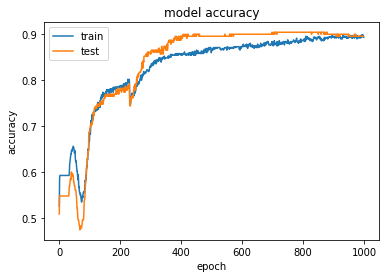

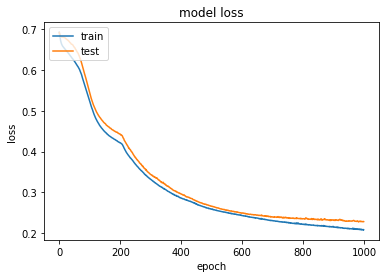

In [113]:
# summarize history for accuracy
plt.plot(history816.history['accuracy'])
plt.plot(history816.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history816.history['loss'])
plt.plot(history816.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model with hidden nodes as 12, 16

### Training

In [108]:
model1216 = keras.Sequential()
model1216.add(Dense(12, input_dim=2, activation="relu"))
model1216.add(Dense(16, activation="relu"))
model1216.add(Dense(2, activation="softmax"))

model1216.compile(optimizer='Nadam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history1216 = model1216.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=40)

Epoch 1/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.7045 - accuracy: 0.4822 - val_loss: 0.6970 - val_accuracy: 0.5043
Epoch 2/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5159 - val_loss: 0.6919 - val_accuracy: 0.5304
Epoch 3/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5477 - val_loss: 0.6881 - val_accuracy: 0.5435
Epoch 4/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5589 - val_loss: 0.6854 - val_accuracy: 0.5348
Epoch 5/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5832 - val_loss: 0.6835 - val_accuracy: 0.5478
Epoch 6/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.5925 - val_loss: 0.6822 - val_accuracy: 0.5478
Epoch 7/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.5925 - val_loss: 0.6813 - val_accuracy: 0.5478
Epoch 

14/14 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.6953 - val_loss: 0.5256 - val_accuracy: 0.6957
Epoch 116/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.6991 - val_loss: 0.5229 - val_accuracy: 0.7000
Epoch 117/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.7065 - val_loss: 0.5208 - val_accuracy: 0.7000
Epoch 118/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.6953 - val_loss: 0.5179 - val_accuracy: 0.7043
Epoch 119/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7028 - val_loss: 0.5147 - val_accuracy: 0.7043
Epoch 120/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7084 - val_loss: 0.5121 - val_accuracy: 0.7087
Epoch 121/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7103 - val_loss: 0.5103 - val_accuracy: 0.7087
Epoch 1

Epoch 172/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.7757 - val_loss: 0.4526 - val_accuracy: 0.7652
Epoch 173/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.7701 - val_loss: 0.4521 - val_accuracy: 0.7652
Epoch 174/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.7701 - val_loss: 0.4506 - val_accuracy: 0.7652
Epoch 175/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.7720 - val_loss: 0.4491 - val_accuracy: 0.7783
Epoch 176/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.7776 - val_loss: 0.4481 - val_accuracy: 0.7826
Epoch 177/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.7757 - val_loss: 0.4480 - val_accuracy: 0.7739
Epoch 178/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.7701 - val_loss: 0.4474 - val_accuracy:

Epoch 229/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.7907 - val_loss: 0.4129 - val_accuracy: 0.7913
Epoch 230/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.7869 - val_loss: 0.4120 - val_accuracy: 0.7913
Epoch 231/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.7907 - val_loss: 0.4116 - val_accuracy: 0.7913
Epoch 232/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.7907 - val_loss: 0.4106 - val_accuracy: 0.7913
Epoch 233/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.7925 - val_loss: 0.4098 - val_accuracy: 0.7913
Epoch 234/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.7907 - val_loss: 0.4094 - val_accuracy: 0.7913
Epoch 235/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.7925 - val_loss: 0.4081 - val_accuracy:

Epoch 286/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8299 - val_loss: 0.3649 - val_accuracy: 0.8217
Epoch 287/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8280 - val_loss: 0.3654 - val_accuracy: 0.8304
Epoch 288/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8299 - val_loss: 0.3646 - val_accuracy: 0.8435
Epoch 289/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8318 - val_loss: 0.3628 - val_accuracy: 0.8478
Epoch 290/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8355 - val_loss: 0.3619 - val_accuracy: 0.8522
Epoch 291/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3414 - accuracy: 0.8336 - val_loss: 0.3605 - val_accuracy: 0.8565
Epoch 292/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8393 - val_loss: 0.3597 - val_accuracy:

Epoch 343/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.8579 - val_loss: 0.3178 - val_accuracy: 0.8870
Epoch 344/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.8579 - val_loss: 0.3168 - val_accuracy: 0.8826
Epoch 345/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8598 - val_loss: 0.3164 - val_accuracy: 0.8826
Epoch 346/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8579 - val_loss: 0.3159 - val_accuracy: 0.8826
Epoch 347/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3019 - accuracy: 0.8561 - val_loss: 0.3147 - val_accuracy: 0.8870
Epoch 348/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8598 - val_loss: 0.3135 - val_accuracy: 0.8870
Epoch 349/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.3003 - accuracy: 0.8561 - val_loss: 0.3131 - val_accuracy:

Epoch 400/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2717 - accuracy: 0.8766 - val_loss: 0.2836 - val_accuracy: 0.8826
Epoch 401/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2708 - accuracy: 0.8748 - val_loss: 0.2823 - val_accuracy: 0.8913
Epoch 402/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2709 - accuracy: 0.8748 - val_loss: 0.2812 - val_accuracy: 0.8957
Epoch 403/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2701 - accuracy: 0.8766 - val_loss: 0.2812 - val_accuracy: 0.8913
Epoch 404/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2694 - accuracy: 0.8729 - val_loss: 0.2807 - val_accuracy: 0.8913
Epoch 405/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2694 - accuracy: 0.8729 - val_loss: 0.2805 - val_accuracy: 0.8913
Epoch 406/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2690 - accuracy: 0.8766 - val_loss: 0.2804 - val_accuracy:

Epoch 457/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.8766 - val_loss: 0.2606 - val_accuracy: 0.8913
Epoch 458/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.8785 - val_loss: 0.2599 - val_accuracy: 0.8957
Epoch 459/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.8766 - val_loss: 0.2596 - val_accuracy: 0.8957
Epoch 460/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.8766 - val_loss: 0.2590 - val_accuracy: 0.8957
Epoch 461/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.8766 - val_loss: 0.2591 - val_accuracy: 0.8957
Epoch 462/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.8785 - val_loss: 0.2583 - val_accuracy: 0.8957
Epoch 463/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.8748 - val_loss: 0.2579 - val_accuracy:

14/14 [==============================] - 0s 2ms/step - loss: 0.2176 - accuracy: 0.9065 - val_loss: 0.2358 - val_accuracy: 0.9217
Epoch 570/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9047 - val_loss: 0.2360 - val_accuracy: 0.9174
Epoch 571/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.9047 - val_loss: 0.2362 - val_accuracy: 0.9087
Epoch 572/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9065 - val_loss: 0.2371 - val_accuracy: 0.9087
Epoch 573/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9047 - val_loss: 0.2369 - val_accuracy: 0.9087
Epoch 574/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2167 - accuracy: 0.9047 - val_loss: 0.2358 - val_accuracy: 0.9130
Epoch 575/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.9009 - val_loss: 0.2358 - val_accuracy: 0.9130
Epoch 5

Epoch 626/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9178 - val_loss: 0.2279 - val_accuracy: 0.9174
Epoch 627/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9178 - val_loss: 0.2280 - val_accuracy: 0.9174
Epoch 628/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9140 - val_loss: 0.2279 - val_accuracy: 0.9174
Epoch 629/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9159 - val_loss: 0.2264 - val_accuracy: 0.9174
Epoch 630/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9178 - val_loss: 0.2273 - val_accuracy: 0.9174
Epoch 631/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9178 - val_loss: 0.2264 - val_accuracy: 0.9174
Epoch 632/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9178 - val_loss: 0.2263 - val_accuracy:

Epoch 739/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.9346 - val_loss: 0.2139 - val_accuracy: 0.9261
Epoch 740/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1785 - accuracy: 0.9327 - val_loss: 0.2159 - val_accuracy: 0.9217
Epoch 741/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1784 - accuracy: 0.9308 - val_loss: 0.2137 - val_accuracy: 0.9261
Epoch 742/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1777 - accuracy: 0.9327 - val_loss: 0.2127 - val_accuracy: 0.9261
Epoch 743/1000
14/14 [==============================] - ETA: 0s - loss: 0.1932 - accuracy: 0.95 - 0s 3ms/step - loss: 0.1779 - accuracy: 0.9308 - val_loss: 0.2116 - val_accuracy: 0.9261
Epoch 744/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1769 - accuracy: 0.9327 - val_loss: 0.2113 - val_accuracy: 0.9261
Epoch 745/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1773 - accuracy:

14/14 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9458 - val_loss: 0.1985 - val_accuracy: 0.9217
Epoch 852/1000
14/14 [==============================] - 0s 3ms/step - loss: 0.1555 - accuracy: 0.9477 - val_loss: 0.1973 - val_accuracy: 0.9261
Epoch 853/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9458 - val_loss: 0.1945 - val_accuracy: 0.9217
Epoch 854/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1546 - accuracy: 0.9458 - val_loss: 0.1958 - val_accuracy: 0.9261
Epoch 855/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9421 - val_loss: 0.1994 - val_accuracy: 0.9261
Epoch 856/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1539 - accuracy: 0.9477 - val_loss: 0.1960 - val_accuracy: 0.9261
Epoch 857/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1539 - accuracy: 0.9458 - val_loss: 0.1967 - val_accuracy: 0.9261
Epoch 8

Epoch 908/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1416 - accuracy: 0.9514 - val_loss: 0.1864 - val_accuracy: 0.9261
Epoch 909/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.9514 - val_loss: 0.1880 - val_accuracy: 0.9217
Epoch 910/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1410 - accuracy: 0.9514 - val_loss: 0.1890 - val_accuracy: 0.9261
Epoch 911/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1409 - accuracy: 0.9514 - val_loss: 0.1885 - val_accuracy: 0.9261
Epoch 912/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1410 - accuracy: 0.9514 - val_loss: 0.1906 - val_accuracy: 0.9261
Epoch 913/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.9514 - val_loss: 0.1886 - val_accuracy: 0.9261
Epoch 914/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1405 - accuracy: 0.9533 - val_loss: 0.1896 - val_accuracy:

Epoch 965/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9589 - val_loss: 0.1787 - val_accuracy: 0.9348
Epoch 966/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9589 - val_loss: 0.1812 - val_accuracy: 0.9348
Epoch 967/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1266 - accuracy: 0.9607 - val_loss: 0.1795 - val_accuracy: 0.9304
Epoch 968/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.9589 - val_loss: 0.1795 - val_accuracy: 0.9348
Epoch 969/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1259 - accuracy: 0.9607 - val_loss: 0.1807 - val_accuracy: 0.9348
Epoch 970/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.9607 - val_loss: 0.1802 - val_accuracy: 0.9348
Epoch 971/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.1259 - accuracy: 0.9645 - val_loss: 0.1807 - val_accuracy:

### Evaluation

In [87]:
test_loss, test_acc = model1216.evaluate(X_test, y_test)
print('Test accuracy: 12, 16 :', test_acc)

8/8 [==============================] - 0s 857us/step - loss: 0.1624 - accuracy: 0.9565
Test accuracy: 12, 16 : 0.95652174949646


### Accuracy and Loss Plots

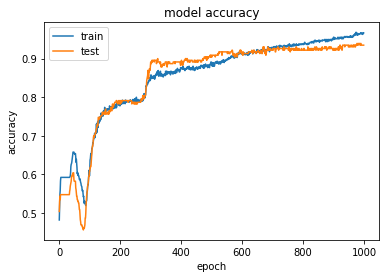

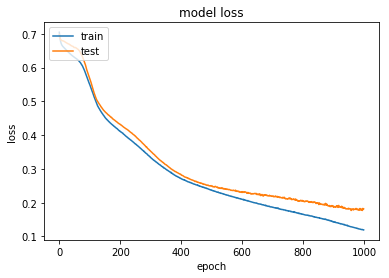

In [109]:
# summarize history for accuracy
plt.plot(history1216.history['accuracy'])
plt.plot(history1216.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1216.history['loss'])
plt.plot(history1216.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Comparison

| Model Combination | Loss | Accuracy |
| --- | --- | --- |
| Hidden Layers (4, 8) | 0.1730 | 0.9478 |
| Hidden Layers (4, 12) | 0.4111 | 0.7957 |
| Hidden Layers (4, 16) | 0.2510 | 0.8870 |
| Hidden Layers (8, 12) | 0.1693 | 0.9478 |
| Hidden Layers (8, 16) | 0.1329 | 0.9609 |
| Hidden Layers (12, 16) | 0.1624 | 0.9565 |

## Inference

We have used ReLU activation function in all the hidden layers added to the model. The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. We have used it since the model that uses it is easier to train and often achieves better performance compared to the other activation functions.

For loss, we have used binary_crossentropy since we have only two labels namely 0s and 1s.

From the table above, we can understand the model performs at a decent level for all the combinations of hidden layers. The performance is lowest for the combination of (4, 12) when the accuracy is 0.7957 and loss is 0.4111. However, it performs the best when the combination of (8, 16) hidden layers are used. The loss is minimum for (8, 16) combination and accuracy peaks at 0.9609.